# Aufgabe 21: Kanalkapazität

Die Problemstellung in Aufgabe 21 ist das Originalbeispiel aus Shannons Veröffentlichung:  
[Claude E. Shannon: A mathematical theory of communication, 1948,, S.25ff](http://worrydream.com/refs/Shannon%20-%20A%20Mathematical%20Theory%20of%20Communication.pdf)  
Die Herleitung der Maximierung ist in der vorhandenen Musterlösung vollständig behandelt worden. Dieses Notebook ist als interaktive Visualisierung des Ergebnisses gedacht. Es sollte, wenn möglich, heruntergeladen und durch einen eigenen jupyter-Server ausgeführt werden. In diesem Fall wird die Variable `online` auf `True` gesetzt und im 3D-Plot kann gedreht und gezoomt werden.

In [1]:
online = True # Setzen: True fuer Webansicht, False fuer interaktive Sicht

![Kanal](figures/A21/Kanal.png)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D

plt.rcParams['font.size'] = 20
plt.rcParams['figure.figsize'] = (20, 10)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['axes.labelsize'] = 25  # fontsize of the x any y labels

## Definitionen der Zwischengrößen

### Punktweiser Informationsgehalt

\begin{align}
    I(p) = -p\log_2(p) \quad \in [0, 1]
\end{align}

Diese Funktion weist einer gegebenen Wahrscheinlichkeit ihren Informationsgehalt zu.

In [3]:
def I(p):
    # Diese Definition ist numerisch stabil
    return np.piecewise(p, [p != 0, p == 0], 
                        [lambda p: -p*np.log2(p), lambda p: 0])

### Negative Entropie einer binären Zufalsvariable
Für eine binäre Zufallsvariable $N$ mit der Wahrscheinlichkeit $\mathrm{Pr}_N(1) = p$ (zum Beispiel der Fehlerwahrscheinlichkeit auf einem Kommunikationskanal) wird hiermit die negative Entropie angegeben:

\begin{align}
    H(N) &= -\sum_{n=0}^1 \log_2\left(\mathrm{Pr}_N(n)\right) \mathrm{Pr}_N(n) = &-&p \log_2(p) - (1{-}p) \log_2(1{-}p) \\
   \Rightarrow u(p) = -H(N) &= && p \log_2(p) + (1{-}p) \log_2(1{-}p) \quad \in [-1, 0]
\end{align}

In [4]:
def u(p):
    return -I(p) - I(1-p)

Damit können im Folgenden einige Terme zusammengefasst werden. Der Zusammenhang zwischen $H(N)$ und $p$ ist im folgenden Diagramm dargestellt:

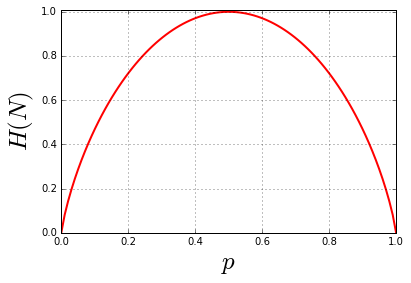

In [5]:
%matplotlib inline
p1d = np.linspace(0, 1, 100)
plt.plot(p1d, -u(p1d), 'r')
plt.xlabel(r'$p$')
plt.ylabel(r'$H(N)$')
plt.xlim((0.0, 1.0))
plt.ylim((0.0, 1.01))
plt.grid(True)

Am Diagramm können einige wichtige Fälle unterschieden werden:

#### Kleine Fehlerwahrscheinlichkeit
Fehler treten sehr selten auf und die Unischerheit ist deshalb klein.

#### Große Fehlerwahrscheinlichkeit:
Fehler treten häufig auf. Da p bekannt ist, kann aber einfach das jeweils andere Symbol als Ergebnis genommen werden. Auch in diesem Fall ist die Unsicherheit sehr klein.

#### Mittlere Fehlerwahrscheinlichkeit:
Die beiden Symbole können schlecht unterschieden werden und die Unsicherheit ist groß. Für $p=1/2$ ist überhaupt keine Übertragung auf dem Teilkanal möglich.

Durch die Maximierung der Transinformation ergeben sich die optimalen Wahrscheinlichkeiten. Strenggenommen muss eine mehrdimensionale Optimierung (Mit Nebenbedingung $q_1 + q_2+ q_3 = 1$) durchgeführt werden:

\begin{align}
    C_s &= \underset{(q_1, q_2, q_3)^\mathrm{T}}{\mathrm{max}}\left\{I(X,Y)\right\} \\
    \Rightarrow (q_1^{\mathrm{opt}}, q_2^{\mathrm{opt}}, q_3^{\mathrm{opt}})^\mathrm{T} &= \underset{(q_1, q_2, q_3)^\mathrm{T}}{\mathrm{argmax}}\left\{I(X,Y)\right\}
\end{align}

Dies kann jedoch durch umgangen werden:
    
Wegen der Symmetrie zwischen den Symbolen gilt $q_3^{\mathrm{opt}}= q_2^{\mathrm{opt}}$
    
Durch die Beziehung $q_1 = 1 - q_2 - q_3$ is $q_1^{\mathrm{opt}} = 1-2 \cdot q_2^{\mathrm{opt}}$ festgelegt.

Es reicht also insgesamt

\begin{align}
    q_2^{\mathrm{opt}} = \underset{q_2}{\mathrm{argmax}}\left\{ I(X,Y) \right\}.
\end{align}

### Transinformation für beliebige Quellwahrscheinlichkeiten
In der Transinformation werden diese Substitutionen ausgenutzt. Es können höchstens drei Symbole unterschieden werden.

Deshalb ist die Transinformation eine Funktion  $\ \mathcal{f}_1:[0,1] \times [0,1] \rightarrow [0, \log_2(3)]$:

\begin{align}
    I(X; Y) &= -q_1 \log_2(q_1) - 2 q_2 \log_2(q_2) + 2 q_2 u(p) \\
            &= -(1-2 q_2) \log_2(1-2 q_2) - 2 q_2 \log2(q_2) + 2 q_2 u(p) \\
            &= \mathcal{f}_1(p, q_2)
\end{align}

In [6]:
def T(p, q):
    return I(1-2*q) + 2*I(q) +2*q*u(p)

### Optimale Quellwahrscheinlichkeiten
Das Ergebnis der Maximierung lässt sich als Funktion von $p$ darstellen:
\begin{align}
    q_1^{\mathrm{opt}}(p) &= \frac{1}{1+2^{1+u(p)}} \\
    q_2^{\mathrm{opt}}(p) &= \frac{1}{2} \frac{2^{1+u(p)}}{1+2^{1+u(p)}} \quad = q_3^{\mathrm{opt}}(p)\\
\end{align}

Auch die Nebenbedingung $q_1 + q_2 + q_3 = 1$ wird offensichtlich erfüllt.

In [7]:
def q1(p):
    return 1/(1 + 2**(1 + u(p)) )

def q2(p):
    return 2**u(p)/(1 + 2**(1 + u(p)) )

### Kanalkapazität
Die Kanalkapazität ist damit eine eindimensionale Funktion von $p$:

\begin{align}
    C_s &= \underset{q_2}{\max} \left\{ I(X; Y)\right\} \\
        &= \mathcal{f}_1(p, q_2^{\mathrm{opt}}(u(p))) \\
        &= \mathcal{f}_2(p)
\end{align}

In [8]:
def C(p):
    return T(p, q2(p))

## Grafische Darstellung

In [9]:
p1d = np.linspace(0, 1, 100)
q1d = np.linspace(0, 0.5, 50)
u1d = np.linspace(0, 1, 100)

### 3D-Plot der Transinformation

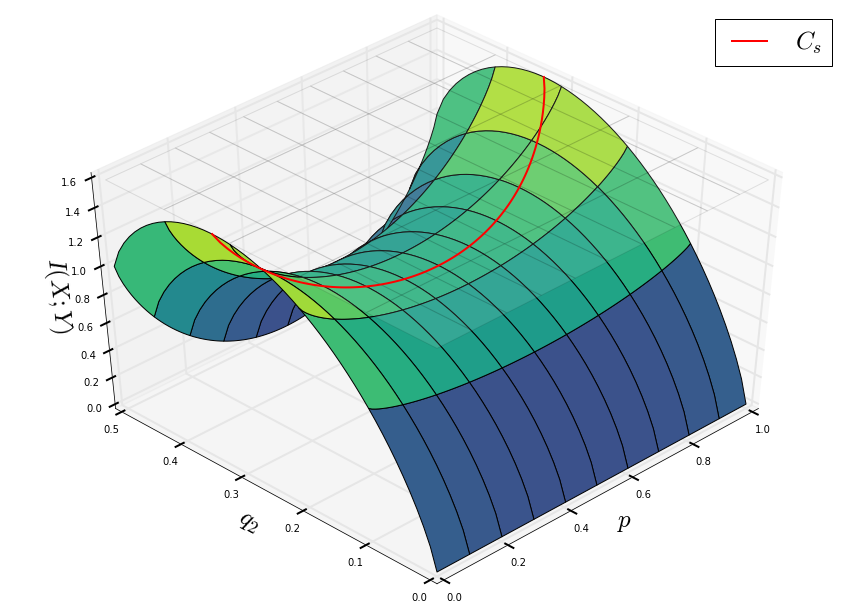

In [10]:
p, q = np.meshgrid(p1d, q1d)
TI = T(p, q)
upper_bound = np.ones_like(p)*np.log2(3)

if(online):
    # Online-Ansicht
    %matplotlib inline
else:
    # Interaktive Ansicht
    %matplotlib qt4

# Allgemeine Einstellungen zum Plot
fig = plt.figure(figsize=(15, 15/np.sqrt(2)))
fig.canvas.set_window_title('Transinformation')
ax = fig.gca(projection='3d')

# Transinformation
surf1 = ax.plot_surface(p, q, TI, cmap='viridis', 
            vmin=np.amin(TI), vmax=np.amax(TI))

#obere Grenze der Transinformation
surf2 = ax.plot_surface(p, q, upper_bound, cmap='gray', 
            vmin=np.amin(TI), vmax=np.amax(TI), alpha=0.1)

# Kanalkapazitaet
line = ax.plot(p1d, q2(p1d), C(p1d), 'r', 
               label= r'$C_s$')

# Achsbeschriftungen
ax.legend(fontsize=25)
ax.grid(True)

ax.set_xlim((0, 1))
ax.invert_xaxis()
ax.set_xlabel(r'$p$', fontsize=25)

ax.set_ylim((0, 0.5))
ax.invert_yaxis()
ax.set_ylabel(r'$q_2$', fontsize=25)

ax.set_zlabel(r'$I(X;Y)$', fontsize=25)

# 3D-Sicht
if online:
    ax.view_init(45, 45)
else:
    ax.view_init(85, 90)

## Optimale Werte für verschiedene Fehlerwahrscheinlichkeiten

In [11]:
capacity_data = pd.DataFrame(
    [[p, u(p), q1(p), q2(p), C(p)] for p in  [0, 0.01, 0.5]], 
    columns=['p', 'u(p)', 'q_1(p)', 'q_2(p)', 'C_s(p)']
).round(3).set_index('p')

capacity_data

,u(p),q_1(p),q_2(p),C_s(p)
p,,,,
0.00,0.000,0.333,0.333,1.585
0.01,-0.081,0.346,0.327,1.532
0.50,-1.000,0.500,0.250,1.000


### Interpretation:

#### $p=0$:
Es treten keine Fehler auf. Alle Symbole sind in gleicher Weise übertragbar, weshalb $q_1 = q_2 = q_3 = 1/3$ gewählt wird. In diesem Fall kann die obere Schranke der Transinformation $C_s = I_{max} = \log_2(3)\, \mathrm{Bit}$ erreicht werden, weil drei Symbole unterschieden werden können.

#### $p=1/2$:
Während $X=1$ weiterhin fehlerfrei übertragen kann, können $X=2$ und $X=3$ micht unterschieden werden. In diesem Fall wird $q_1=1/2$ und $q_2=q_3=1/4$ gesetzt. $H(N)$ erreicht hier das Maximum von $1\, \mathrm{Bit}$.  
Effektiv stehen nur noch zwei Symbole zur Verfügung: $q_1$ und $\overline{q_1}$. Deshalb wird auch nur mit einem Bit gesendet: $C_s = log_2(2)\ \mathrm{Bit}/\text{Symbol} = 1\, \mathrm{Bit}/\text{Symbol}$.

#### $p=0.01$:
Dieser Fall ist näher an $p=0$.  Es treten selten Fehler auf und es besteht eine kleine Unsicherheit auf dem unteren Teil des Kanals: $H(N) = 0,081\, \mathrm{Bit}/\text{Symbol}$.
Dies wirkt sich durch eine geringfügige Verringerung von $q_2 = q_3 \approx 0,327$ aus, man verlässt sich also etwas mehr auf $X=1$. Die resultierende Kanalkapazität $C_s = 1,532\, \mathrm{Bit}/\text{Symbol}$ ist jedoch schon signifikant gesunken. Dies liegt an der verhältnismäßig großen Steigung der Transinformationsfläche an den Rändern des Wertebereichs von $p$.